# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [2]:
X,y,c = make_blobs(500, cluster_std= 0.8, centers=6, n_features=2, return_centers=True)

In [3]:
X

array([[ 2.34371187e+00, -3.04648616e+00],
       [ 5.84135777e+00,  8.46300531e-01],
       [-9.26386749e+00,  9.35039674e-01],
       [ 4.43746425e+00, -2.74524538e-01],
       [-2.85323054e+00, -3.82875431e+00],
       [-8.94330107e+00,  4.76830071e-01],
       [ 1.06307570e+00, -4.97493682e+00],
       [ 2.19231094e+00, -5.67514300e+00],
       [-4.48164438e+00,  9.59757096e+00],
       [ 2.51166498e+00,  9.09954762e+00],
       [ 3.84380409e+00,  5.48442941e-01],
       [-4.20554921e+00,  8.80937516e+00],
       [ 2.92538762e+00,  1.00769386e+01],
       [-1.03338552e+01, -1.40027954e-01],
       [ 4.63334689e+00, -1.50786848e+00],
       [-9.06968183e+00, -5.77675510e-01],
       [ 3.01914095e+00,  9.02403889e+00],
       [-3.83699209e+00,  1.06978037e+01],
       [-2.93723185e-01, -5.28977614e+00],
       [-3.11968801e+00, -4.25746747e+00],
       [-4.20466529e+00,  9.12323046e+00],
       [ 1.90438362e+00,  9.26583558e+00],
       [-3.70148572e+00,  1.01536177e+01],
       [-2.

In [4]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)


In [5]:
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2' :c[:,1]
    }
)

## Visualización de datos

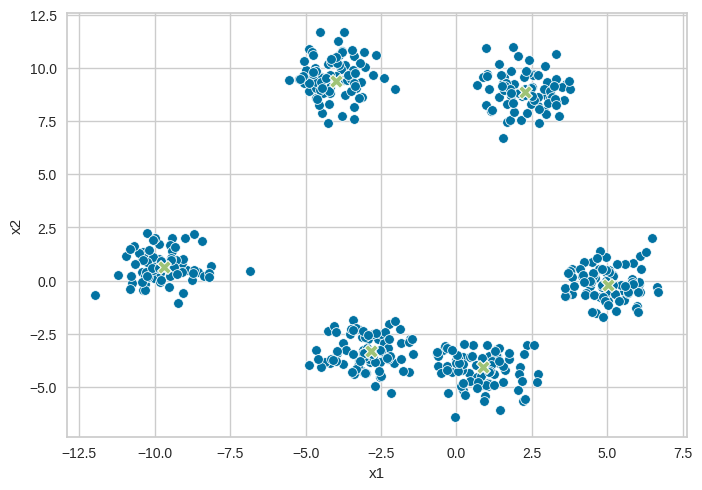

In [6]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=100 )
plt.show()

## Aplicando K-means

In [7]:
kmeans = KMeans(n_clusters=5)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        'x1':k_means_centers[:,0],
        'x2':k_means_centers[:,1]
     
    }
)

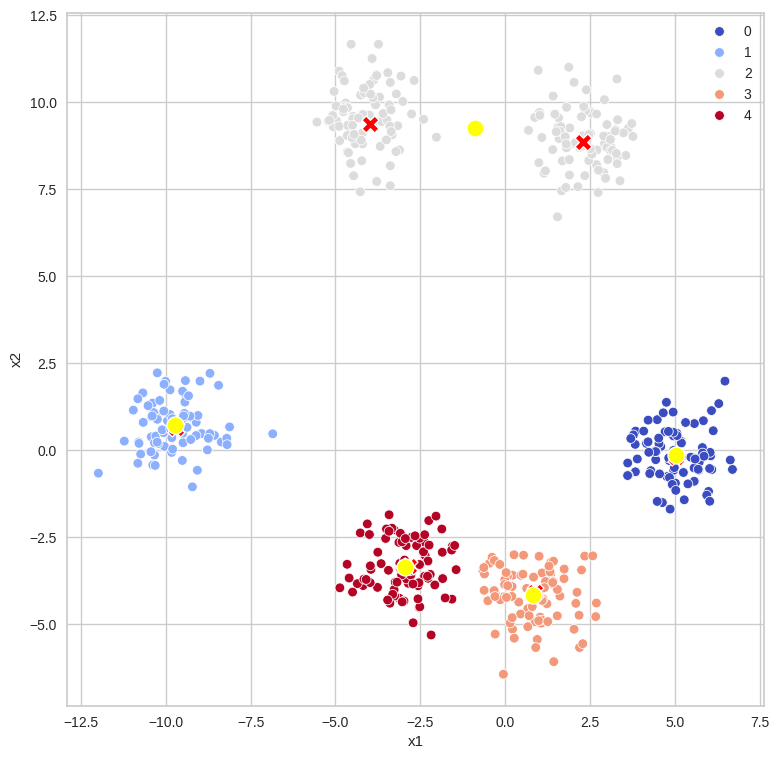

In [8]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
plt.show()


In [9]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]

        }
    )    
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


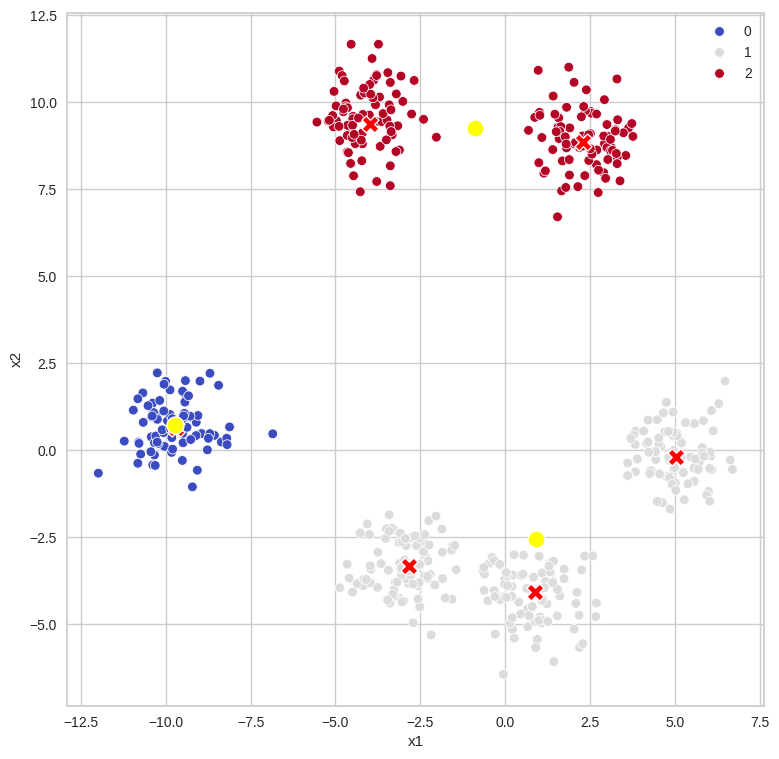

4


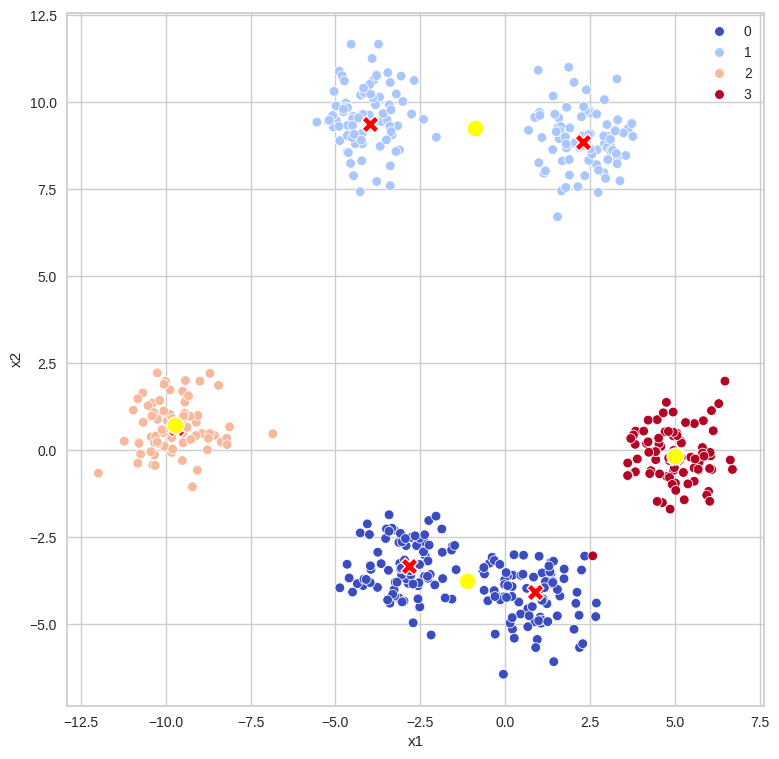

5


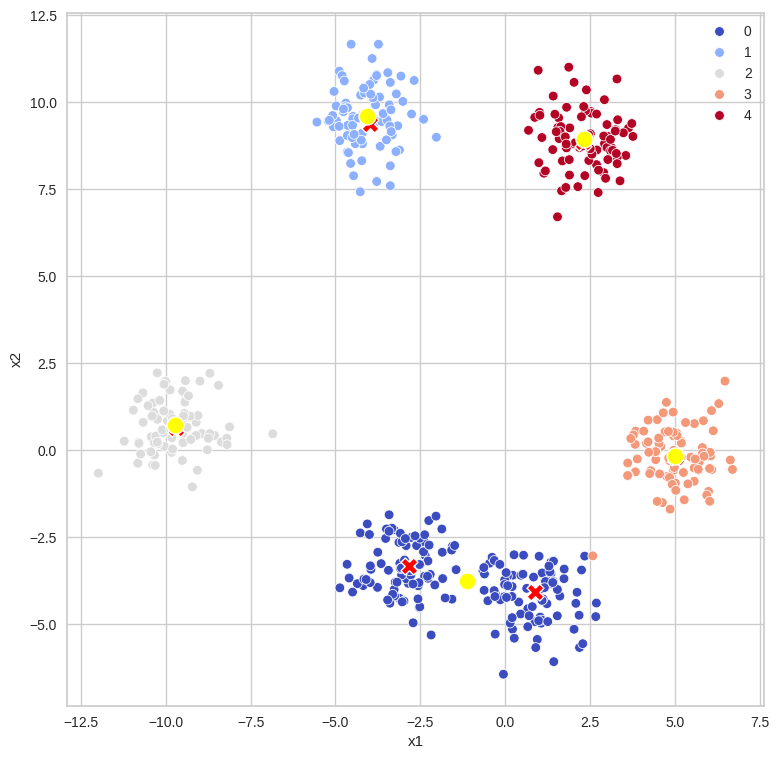

6


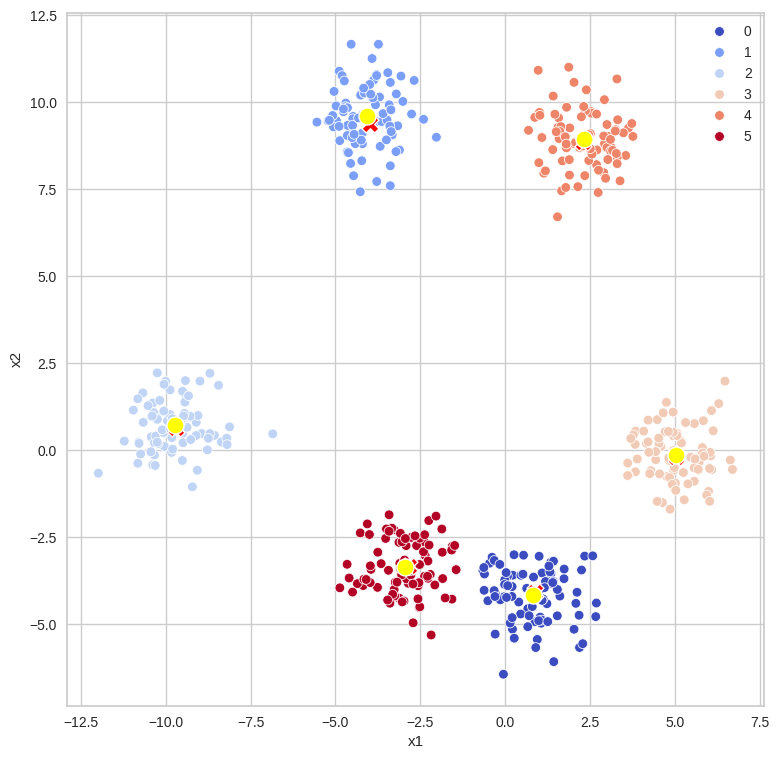

In [10]:
for _ in range(3,7):
    print(_)
    vis_cluster(_)

## Encontrando el valor de K

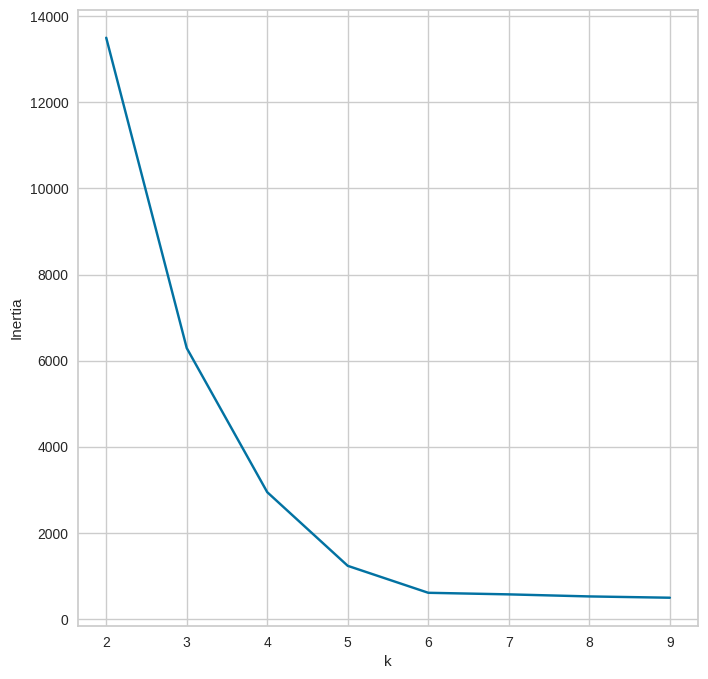

In [11]:
sum_of_squared_distances = []
K = range(2,10)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

#Grafica el calculo para escoger el valor de k
plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


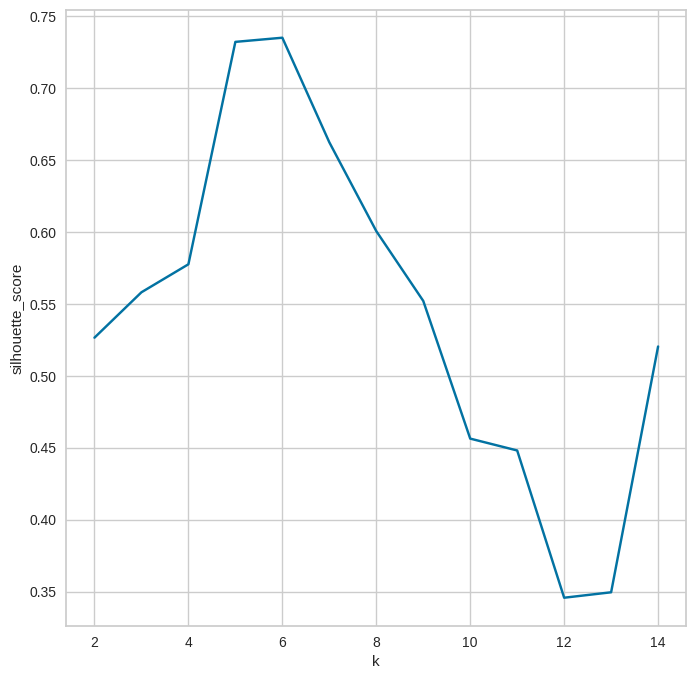

In [12]:
silhouette_scores = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X,y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

## Evaluando clusters con K-means

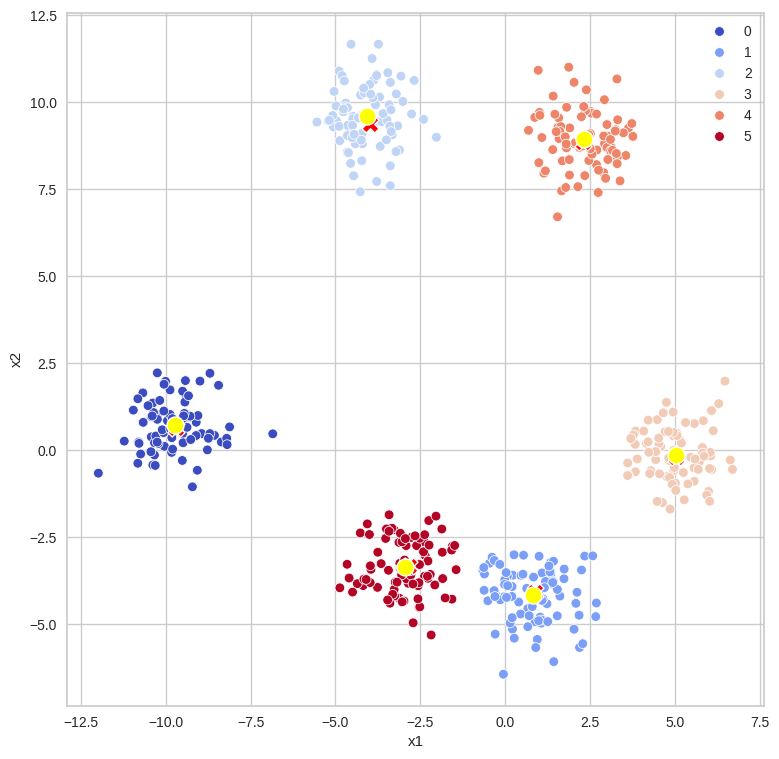

In [13]:
vis_cluster(6)

,estimator,KMeans(n_clusters=6)
,ax,<Axes: >
,colors,'yellowbrick'
,is_fitted,'auto'
,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None


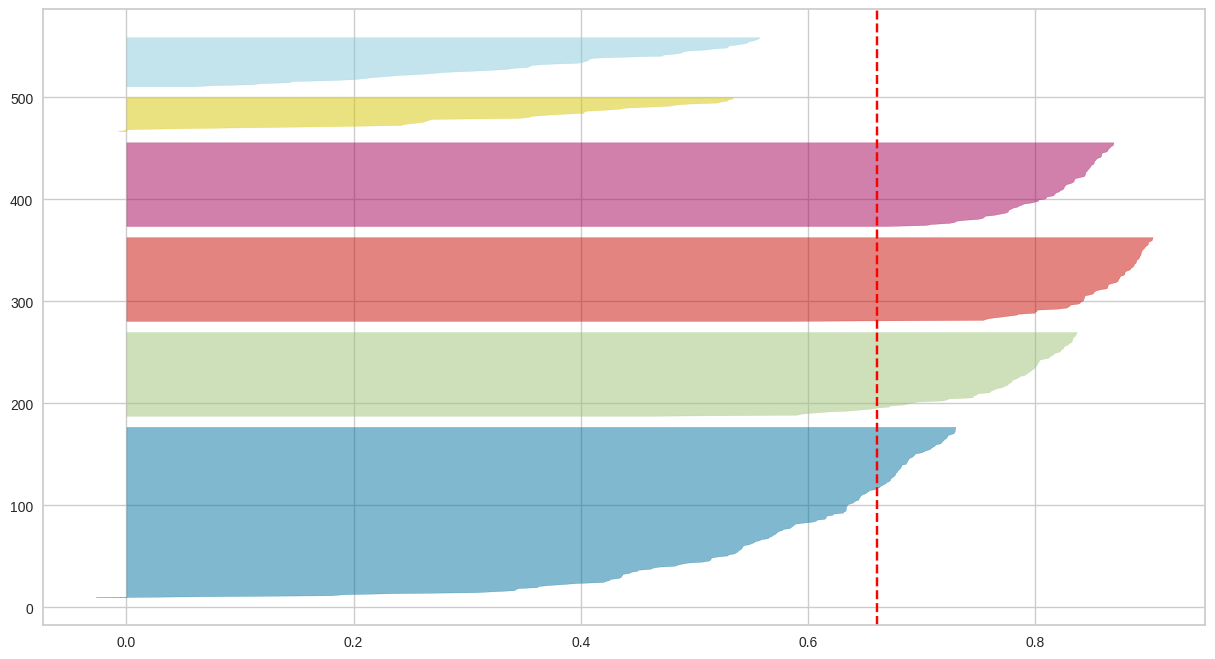

In [14]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=6) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)